In [1]:
import numpy as np
import pandas as pd
import os
import math
import random 
import cv2 as cv

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

1. Data Load
치매 예방을 위한 라이프로그 치매 분류

9,327 rows × 2 columns x 5 picture

For more details https://aihub.or.kr/problem_contest/nipa-learning-platform/6

In [3]:
# original data : data 

path = "./Dataset/pic_dataset/sig_data1/"

FAST_RUN = False
IMAGE_WIDTH=34
IMAGE_HEIGHT=34
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

filenames = os.listdir(path)
categories = []
sobee = []

# data = cv.imread('/content/gdrive/My Drive/CoLab/Dataset/pic_dataset/CN_0.png', 0)
# img = cv.resize(data, None, fx=28/349, fy=28/231)
# print(img/255)
# print(img.shape)

for filename in filenames:
    category = filename.split('_')[0]
    categories.append(category)
#    if category == 'CN':
#        categories.append(0)
#    elif  category == 'MCI':
#        categories.append(1)
#    else:
#        categories.append(2)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df

,filename,category
0,CN_0.png,CN
1,CN_1.png,CN
2,CN_10.png,CN
3,CN_1000.png,CN
4,CN_1001.png,CN
...,...,...
9322,MCI_95.png,MCI
9323,MCI_96.png,MCI
9324,MCI_97.png,MCI
9325,MCI_98.png,MCI


2. EDA
9,327 rows × 66 columns

148명에 대한 데일리 라이프로그 데이터
크게 1. 기본 정보 2. 걸음거리 3.수면 4.컨버팅 데이터로 나눌 수 있겠습니다.

4. converting

CONVERT(activity_class_5min USING utf8)
CONVERT(activity_met_1min USING utf8)
CONVERT(sleep_hr_5min USING utf8)
CONVERT(sleep_hypnogram_5min USING utf8)
CONVERT(sleep_rmssd_5min USING utf8)
y variable

DIAG_NM
정상(CN), 경도인지 장애(MCI), 치매(Dem)

In [4]:
df.shape

(9327, 2)

In [20]:
y_data = df['category'].copy()

#y_data.to_csv('/content/gdrive/My Drive/CoLab/y_data.csv')

In [5]:
for i in range(len(filenames)):
  mypath = path + '/' + filenames[i]
  print(mypath)
  data = cv.imread(mypath, 0)
  img = cv.resize(data, None, fx=28/349, fy=28/231)
  img = img/255
  sobee.append(img)

./Dataset/pic_dataset/sig_data1//CN_0.png
./Dataset/pic_dataset/sig_data1//CN_1.png
./Dataset/pic_dataset/sig_data1//CN_10.png
./Dataset/pic_dataset/sig_data1//CN_1000.png
./Dataset/pic_dataset/sig_data1//CN_1001.png
./Dataset/pic_dataset/sig_data1//CN_1002.png
./Dataset/pic_dataset/sig_data1//CN_1003.png
./Dataset/pic_dataset/sig_data1//CN_1004.png
./Dataset/pic_dataset/sig_data1//CN_1005.png
./Dataset/pic_dataset/sig_data1//CN_1006.png
./Dataset/pic_dataset/sig_data1//CN_1007.png
./Dataset/pic_dataset/sig_data1//CN_1008.png
./Dataset/pic_dataset/sig_data1//CN_1009.png
./Dataset/pic_dataset/sig_data1//CN_1010.png
./Dataset/pic_dataset/sig_data1//CN_1011.png
./Dataset/pic_dataset/sig_data1//CN_1012.png
./Dataset/pic_dataset/sig_data1//CN_1013.png
./Dataset/pic_dataset/sig_data1//CN_1014.png
./Dataset/pic_dataset/sig_data1//CN_1015.png
./Dataset/pic_dataset/sig_data1//CN_1016.png
./Dataset/pic_dataset/sig_data1//CN_1017.png
./Dataset/pic_dataset/sig_data1//CN_1018.png
./Dataset/pic_data

./Dataset/pic_dataset/sig_data1//CN_1429.png
./Dataset/pic_dataset/sig_data1//CN_1430.png
./Dataset/pic_dataset/sig_data1//CN_1431.png
./Dataset/pic_dataset/sig_data1//CN_1432.png
./Dataset/pic_dataset/sig_data1//CN_1433.png
./Dataset/pic_dataset/sig_data1//CN_1434.png
./Dataset/pic_dataset/sig_data1//CN_1435.png
./Dataset/pic_dataset/sig_data1//CN_1436.png
./Dataset/pic_dataset/sig_data1//CN_1437.png
./Dataset/pic_dataset/sig_data1//CN_1438.png
./Dataset/pic_dataset/sig_data1//CN_1439.png
./Dataset/pic_dataset/sig_data1//CN_1440.png
./Dataset/pic_dataset/sig_data1//CN_1441.png
./Dataset/pic_dataset/sig_data1//CN_1442.png
./Dataset/pic_dataset/sig_data1//CN_1443.png
./Dataset/pic_dataset/sig_data1//CN_1444.png
./Dataset/pic_dataset/sig_data1//CN_1445.png
./Dataset/pic_dataset/sig_data1//CN_1446.png
./Dataset/pic_dataset/sig_data1//CN_1447.png
./Dataset/pic_dataset/sig_data1//CN_1448.png
./Dataset/pic_dataset/sig_data1//CN_1449.png
./Dataset/pic_dataset/sig_data1//CN_1450.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_1865.png
./Dataset/pic_dataset/sig_data1//CN_1866.png
./Dataset/pic_dataset/sig_data1//CN_1867.png
./Dataset/pic_dataset/sig_data1//CN_1868.png
./Dataset/pic_dataset/sig_data1//CN_1869.png
./Dataset/pic_dataset/sig_data1//CN_187.png
./Dataset/pic_dataset/sig_data1//CN_1870.png
./Dataset/pic_dataset/sig_data1//CN_1871.png
./Dataset/pic_dataset/sig_data1//CN_1872.png
./Dataset/pic_dataset/sig_data1//CN_1873.png
./Dataset/pic_dataset/sig_data1//CN_1874.png
./Dataset/pic_dataset/sig_data1//CN_1875.png
./Dataset/pic_dataset/sig_data1//CN_188.png
./Dataset/pic_dataset/sig_data1//CN_189.png
./Dataset/pic_dataset/sig_data1//CN_19.png
./Dataset/pic_dataset/sig_data1//CN_190.png
./Dataset/pic_dataset/sig_data1//CN_191.png
./Dataset/pic_dataset/sig_data1//CN_192.png
./Dataset/pic_dataset/sig_data1//CN_193.png
./Dataset/pic_dataset/sig_data1//CN_194.png
./Dataset/pic_dataset/sig_data1//CN_195.png
./Dataset/pic_dataset/sig_data1//CN_196.png
./Dataset/pic_dataset/

./Dataset/pic_dataset/sig_data1//CN_2247.png
./Dataset/pic_dataset/sig_data1//CN_2248.png
./Dataset/pic_dataset/sig_data1//CN_2249.png
./Dataset/pic_dataset/sig_data1//CN_2250.png
./Dataset/pic_dataset/sig_data1//CN_2251.png
./Dataset/pic_dataset/sig_data1//CN_2252.png
./Dataset/pic_dataset/sig_data1//CN_2253.png
./Dataset/pic_dataset/sig_data1//CN_2254.png
./Dataset/pic_dataset/sig_data1//CN_2255.png
./Dataset/pic_dataset/sig_data1//CN_2256.png
./Dataset/pic_dataset/sig_data1//CN_2257.png
./Dataset/pic_dataset/sig_data1//CN_2258.png
./Dataset/pic_dataset/sig_data1//CN_2259.png
./Dataset/pic_dataset/sig_data1//CN_2260.png
./Dataset/pic_dataset/sig_data1//CN_2261.png
./Dataset/pic_dataset/sig_data1//CN_2262.png
./Dataset/pic_dataset/sig_data1//CN_2263.png
./Dataset/pic_dataset/sig_data1//CN_2264.png
./Dataset/pic_dataset/sig_data1//CN_2265.png
./Dataset/pic_dataset/sig_data1//CN_2266.png
./Dataset/pic_dataset/sig_data1//CN_2267.png
./Dataset/pic_dataset/sig_data1//CN_2268.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_2475.png
./Dataset/pic_dataset/sig_data1//CN_2476.png
./Dataset/pic_dataset/sig_data1//CN_2477.png
./Dataset/pic_dataset/sig_data1//CN_2478.png
./Dataset/pic_dataset/sig_data1//CN_2479.png
./Dataset/pic_dataset/sig_data1//CN_2480.png
./Dataset/pic_dataset/sig_data1//CN_2481.png
./Dataset/pic_dataset/sig_data1//CN_2482.png
./Dataset/pic_dataset/sig_data1//CN_2483.png
./Dataset/pic_dataset/sig_data1//CN_2484.png
./Dataset/pic_dataset/sig_data1//CN_2485.png
./Dataset/pic_dataset/sig_data1//CN_2486.png
./Dataset/pic_dataset/sig_data1//CN_2487.png
./Dataset/pic_dataset/sig_data1//CN_2488.png
./Dataset/pic_dataset/sig_data1//CN_2489.png
./Dataset/pic_dataset/sig_data1//CN_2490.png
./Dataset/pic_dataset/sig_data1//CN_2491.png
./Dataset/pic_dataset/sig_data1//CN_2492.png
./Dataset/pic_dataset/sig_data1//CN_2493.png
./Dataset/pic_dataset/sig_data1//CN_2494.png
./Dataset/pic_dataset/sig_data1//CN_2495.png
./Dataset/pic_dataset/sig_data1//CN_2496.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_27.png
./Dataset/pic_dataset/sig_data1//CN_270.png
./Dataset/pic_dataset/sig_data1//CN_2700.png
./Dataset/pic_dataset/sig_data1//CN_2701.png
./Dataset/pic_dataset/sig_data1//CN_2702.png
./Dataset/pic_dataset/sig_data1//CN_2703.png
./Dataset/pic_dataset/sig_data1//CN_2704.png
./Dataset/pic_dataset/sig_data1//CN_2705.png
./Dataset/pic_dataset/sig_data1//CN_2706.png
./Dataset/pic_dataset/sig_data1//CN_2707.png
./Dataset/pic_dataset/sig_data1//CN_2708.png
./Dataset/pic_dataset/sig_data1//CN_2709.png
./Dataset/pic_dataset/sig_data1//CN_271.png
./Dataset/pic_dataset/sig_data1//CN_2710.png
./Dataset/pic_dataset/sig_data1//CN_2711.png
./Dataset/pic_dataset/sig_data1//CN_2712.png
./Dataset/pic_dataset/sig_data1//CN_2713.png
./Dataset/pic_dataset/sig_data1//CN_2714.png
./Dataset/pic_dataset/sig_data1//CN_2715.png
./Dataset/pic_dataset/sig_data1//CN_2716.png
./Dataset/pic_dataset/sig_data1//CN_2717.png
./Dataset/pic_dataset/sig_data1//CN_2718.png
./Dataset/pic_

./Dataset/pic_dataset/sig_data1//CN_291.png
./Dataset/pic_dataset/sig_data1//CN_2910.png
./Dataset/pic_dataset/sig_data1//CN_2911.png
./Dataset/pic_dataset/sig_data1//CN_2912.png
./Dataset/pic_dataset/sig_data1//CN_2913.png
./Dataset/pic_dataset/sig_data1//CN_2914.png
./Dataset/pic_dataset/sig_data1//CN_2915.png
./Dataset/pic_dataset/sig_data1//CN_2916.png
./Dataset/pic_dataset/sig_data1//CN_2917.png
./Dataset/pic_dataset/sig_data1//CN_2918.png
./Dataset/pic_dataset/sig_data1//CN_2919.png
./Dataset/pic_dataset/sig_data1//CN_292.png
./Dataset/pic_dataset/sig_data1//CN_2920.png
./Dataset/pic_dataset/sig_data1//CN_2921.png
./Dataset/pic_dataset/sig_data1//CN_2922.png
./Dataset/pic_dataset/sig_data1//CN_2923.png
./Dataset/pic_dataset/sig_data1//CN_2924.png
./Dataset/pic_dataset/sig_data1//CN_2925.png
./Dataset/pic_dataset/sig_data1//CN_2926.png
./Dataset/pic_dataset/sig_data1//CN_2927.png
./Dataset/pic_dataset/sig_data1//CN_2928.png
./Dataset/pic_dataset/sig_data1//CN_2929.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_3150.png
./Dataset/pic_dataset/sig_data1//CN_3151.png
./Dataset/pic_dataset/sig_data1//CN_3152.png
./Dataset/pic_dataset/sig_data1//CN_3153.png
./Dataset/pic_dataset/sig_data1//CN_3154.png
./Dataset/pic_dataset/sig_data1//CN_3155.png
./Dataset/pic_dataset/sig_data1//CN_3156.png
./Dataset/pic_dataset/sig_data1//CN_3157.png
./Dataset/pic_dataset/sig_data1//CN_3158.png
./Dataset/pic_dataset/sig_data1//CN_3159.png
./Dataset/pic_dataset/sig_data1//CN_316.png
./Dataset/pic_dataset/sig_data1//CN_3160.png
./Dataset/pic_dataset/sig_data1//CN_3161.png
./Dataset/pic_dataset/sig_data1//CN_3162.png
./Dataset/pic_dataset/sig_data1//CN_3163.png
./Dataset/pic_dataset/sig_data1//CN_3164.png
./Dataset/pic_dataset/sig_data1//CN_3165.png
./Dataset/pic_dataset/sig_data1//CN_3166.png
./Dataset/pic_dataset/sig_data1//CN_3167.png
./Dataset/pic_dataset/sig_data1//CN_3168.png
./Dataset/pic_dataset/sig_data1//CN_3169.png
./Dataset/pic_dataset/sig_data1//CN_317.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_3493.png
./Dataset/pic_dataset/sig_data1//CN_3494.png
./Dataset/pic_dataset/sig_data1//CN_3495.png
./Dataset/pic_dataset/sig_data1//CN_3496.png
./Dataset/pic_dataset/sig_data1//CN_3497.png
./Dataset/pic_dataset/sig_data1//CN_3498.png
./Dataset/pic_dataset/sig_data1//CN_3499.png
./Dataset/pic_dataset/sig_data1//CN_35.png
./Dataset/pic_dataset/sig_data1//CN_3500.png
./Dataset/pic_dataset/sig_data1//CN_3501.png
./Dataset/pic_dataset/sig_data1//CN_3502.png
./Dataset/pic_dataset/sig_data1//CN_3569.png
./Dataset/pic_dataset/sig_data1//CN_3570.png
./Dataset/pic_dataset/sig_data1//CN_3571.png
./Dataset/pic_dataset/sig_data1//CN_3572.png
./Dataset/pic_dataset/sig_data1//CN_3573.png
./Dataset/pic_dataset/sig_data1//CN_3574.png
./Dataset/pic_dataset/sig_data1//CN_3575.png
./Dataset/pic_dataset/sig_data1//CN_3576.png
./Dataset/pic_dataset/sig_data1//CN_3577.png
./Dataset/pic_dataset/sig_data1//CN_3578.png
./Dataset/pic_dataset/sig_data1//CN_3579.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_3786.png
./Dataset/pic_dataset/sig_data1//CN_3787.png
./Dataset/pic_dataset/sig_data1//CN_3788.png
./Dataset/pic_dataset/sig_data1//CN_3789.png
./Dataset/pic_dataset/sig_data1//CN_3790.png
./Dataset/pic_dataset/sig_data1//CN_3791.png
./Dataset/pic_dataset/sig_data1//CN_3792.png
./Dataset/pic_dataset/sig_data1//CN_3793.png
./Dataset/pic_dataset/sig_data1//CN_3794.png
./Dataset/pic_dataset/sig_data1//CN_3795.png
./Dataset/pic_dataset/sig_data1//CN_3796.png
./Dataset/pic_dataset/sig_data1//CN_3797.png
./Dataset/pic_dataset/sig_data1//CN_3798.png
./Dataset/pic_dataset/sig_data1//CN_3799.png
./Dataset/pic_dataset/sig_data1//CN_38.png
./Dataset/pic_dataset/sig_data1//CN_3800.png
./Dataset/pic_dataset/sig_data1//CN_3801.png
./Dataset/pic_dataset/sig_data1//CN_3802.png
./Dataset/pic_dataset/sig_data1//CN_3803.png
./Dataset/pic_dataset/sig_data1//CN_3804.png
./Dataset/pic_dataset/sig_data1//CN_3805.png
./Dataset/pic_dataset/sig_data1//CN_3806.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_4247.png
./Dataset/pic_dataset/sig_data1//CN_4248.png
./Dataset/pic_dataset/sig_data1//CN_4249.png
./Dataset/pic_dataset/sig_data1//CN_425.png
./Dataset/pic_dataset/sig_data1//CN_4250.png
./Dataset/pic_dataset/sig_data1//CN_4251.png
./Dataset/pic_dataset/sig_data1//CN_4252.png
./Dataset/pic_dataset/sig_data1//CN_4253.png
./Dataset/pic_dataset/sig_data1//CN_4254.png
./Dataset/pic_dataset/sig_data1//CN_4255.png
./Dataset/pic_dataset/sig_data1//CN_4256.png
./Dataset/pic_dataset/sig_data1//CN_4257.png
./Dataset/pic_dataset/sig_data1//CN_4258.png
./Dataset/pic_dataset/sig_data1//CN_4259.png
./Dataset/pic_dataset/sig_data1//CN_426.png
./Dataset/pic_dataset/sig_data1//CN_4260.png
./Dataset/pic_dataset/sig_data1//CN_4261.png
./Dataset/pic_dataset/sig_data1//CN_4262.png
./Dataset/pic_dataset/sig_data1//CN_4263.png
./Dataset/pic_dataset/sig_data1//CN_4264.png
./Dataset/pic_dataset/sig_data1//CN_4265.png
./Dataset/pic_dataset/sig_data1//CN_4266.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_4492.png
./Dataset/pic_dataset/sig_data1//CN_4493.png
./Dataset/pic_dataset/sig_data1//CN_4494.png
./Dataset/pic_dataset/sig_data1//CN_4495.png
./Dataset/pic_dataset/sig_data1//CN_4496.png
./Dataset/pic_dataset/sig_data1//CN_4497.png
./Dataset/pic_dataset/sig_data1//CN_4498.png
./Dataset/pic_dataset/sig_data1//CN_4499.png
./Dataset/pic_dataset/sig_data1//CN_450.png
./Dataset/pic_dataset/sig_data1//CN_4500.png
./Dataset/pic_dataset/sig_data1//CN_4501.png
./Dataset/pic_dataset/sig_data1//CN_4502.png
./Dataset/pic_dataset/sig_data1//CN_4503.png
./Dataset/pic_dataset/sig_data1//CN_4504.png
./Dataset/pic_dataset/sig_data1//CN_4505.png
./Dataset/pic_dataset/sig_data1//CN_4506.png
./Dataset/pic_dataset/sig_data1//CN_4507.png
./Dataset/pic_dataset/sig_data1//CN_4508.png
./Dataset/pic_dataset/sig_data1//CN_4509.png
./Dataset/pic_dataset/sig_data1//CN_4510.png
./Dataset/pic_dataset/sig_data1//CN_4511.png
./Dataset/pic_dataset/sig_data1//CN_4512.png
./Dataset/p

./Dataset/pic_dataset/sig_data1//CN_4795.png
./Dataset/pic_dataset/sig_data1//CN_4796.png
./Dataset/pic_dataset/sig_data1//CN_4797.png
./Dataset/pic_dataset/sig_data1//CN_4798.png
./Dataset/pic_dataset/sig_data1//CN_4799.png
./Dataset/pic_dataset/sig_data1//CN_4800.png
./Dataset/pic_dataset/sig_data1//CN_4801.png
./Dataset/pic_dataset/sig_data1//CN_4802.png
./Dataset/pic_dataset/sig_data1//CN_4803.png
./Dataset/pic_dataset/sig_data1//CN_4804.png
./Dataset/pic_dataset/sig_data1//CN_4805.png
./Dataset/pic_dataset/sig_data1//CN_4806.png
./Dataset/pic_dataset/sig_data1//CN_4807.png
./Dataset/pic_dataset/sig_data1//CN_4808.png
./Dataset/pic_dataset/sig_data1//CN_4809.png
./Dataset/pic_dataset/sig_data1//CN_4810.png
./Dataset/pic_dataset/sig_data1//CN_4811.png
./Dataset/pic_dataset/sig_data1//CN_4812.png
./Dataset/pic_dataset/sig_data1//CN_4813.png
./Dataset/pic_dataset/sig_data1//CN_4814.png
./Dataset/pic_dataset/sig_data1//CN_4815.png
./Dataset/pic_dataset/sig_data1//CN_4816.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_5186.png
./Dataset/pic_dataset/sig_data1//CN_5187.png
./Dataset/pic_dataset/sig_data1//CN_5188.png
./Dataset/pic_dataset/sig_data1//CN_5189.png
./Dataset/pic_dataset/sig_data1//CN_5190.png
./Dataset/pic_dataset/sig_data1//CN_5261.png
./Dataset/pic_dataset/sig_data1//CN_5262.png
./Dataset/pic_dataset/sig_data1//CN_5263.png
./Dataset/pic_dataset/sig_data1//CN_5264.png
./Dataset/pic_dataset/sig_data1//CN_5265.png
./Dataset/pic_dataset/sig_data1//CN_5266.png
./Dataset/pic_dataset/sig_data1//CN_5267.png
./Dataset/pic_dataset/sig_data1//CN_5268.png
./Dataset/pic_dataset/sig_data1//CN_5269.png
./Dataset/pic_dataset/sig_data1//CN_5270.png
./Dataset/pic_dataset/sig_data1//CN_5271.png
./Dataset/pic_dataset/sig_data1//CN_5272.png
./Dataset/pic_dataset/sig_data1//CN_5273.png
./Dataset/pic_dataset/sig_data1//CN_5274.png
./Dataset/pic_dataset/sig_data1//CN_5275.png
./Dataset/pic_dataset/sig_data1//CN_5276.png
./Dataset/pic_dataset/sig_data1//CN_5277.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_561.png
./Dataset/pic_dataset/sig_data1//CN_5610.png
./Dataset/pic_dataset/sig_data1//CN_5611.png
./Dataset/pic_dataset/sig_data1//CN_5612.png
./Dataset/pic_dataset/sig_data1//CN_5613.png
./Dataset/pic_dataset/sig_data1//CN_5614.png
./Dataset/pic_dataset/sig_data1//CN_5615.png
./Dataset/pic_dataset/sig_data1//CN_5616.png
./Dataset/pic_dataset/sig_data1//CN_5617.png
./Dataset/pic_dataset/sig_data1//CN_5618.png
./Dataset/pic_dataset/sig_data1//CN_5619.png
./Dataset/pic_dataset/sig_data1//CN_562.png
./Dataset/pic_dataset/sig_data1//CN_5620.png
./Dataset/pic_dataset/sig_data1//CN_5621.png
./Dataset/pic_dataset/sig_data1//CN_5622.png
./Dataset/pic_dataset/sig_data1//CN_5623.png
./Dataset/pic_dataset/sig_data1//CN_5624.png
./Dataset/pic_dataset/sig_data1//CN_5625.png
./Dataset/pic_dataset/sig_data1//CN_5626.png
./Dataset/pic_dataset/sig_data1//CN_5627.png
./Dataset/pic_dataset/sig_data1//CN_5628.png
./Dataset/pic_dataset/sig_data1//CN_5629.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_5895.png
./Dataset/pic_dataset/sig_data1//CN_5896.png
./Dataset/pic_dataset/sig_data1//CN_5897.png
./Dataset/pic_dataset/sig_data1//CN_5898.png
./Dataset/pic_dataset/sig_data1//CN_5899.png
./Dataset/pic_dataset/sig_data1//CN_590.png
./Dataset/pic_dataset/sig_data1//CN_5900.png
./Dataset/pic_dataset/sig_data1//CN_5901.png
./Dataset/pic_dataset/sig_data1//CN_5902.png
./Dataset/pic_dataset/sig_data1//CN_5903.png
./Dataset/pic_dataset/sig_data1//CN_5904.png
./Dataset/pic_dataset/sig_data1//CN_5905.png
./Dataset/pic_dataset/sig_data1//CN_5906.png
./Dataset/pic_dataset/sig_data1//CN_5907.png
./Dataset/pic_dataset/sig_data1//CN_5908.png
./Dataset/pic_dataset/sig_data1//CN_5909.png
./Dataset/pic_dataset/sig_data1//CN_591.png
./Dataset/pic_dataset/sig_data1//CN_5910.png
./Dataset/pic_dataset/sig_data1//CN_5911.png
./Dataset/pic_dataset/sig_data1//CN_5912.png
./Dataset/pic_dataset/sig_data1//CN_5913.png
./Dataset/pic_dataset/sig_data1//CN_5914.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_633.png
./Dataset/pic_dataset/sig_data1//CN_634.png
./Dataset/pic_dataset/sig_data1//CN_6346.png
./Dataset/pic_dataset/sig_data1//CN_6347.png
./Dataset/pic_dataset/sig_data1//CN_6348.png
./Dataset/pic_dataset/sig_data1//CN_6349.png
./Dataset/pic_dataset/sig_data1//CN_635.png
./Dataset/pic_dataset/sig_data1//CN_6350.png
./Dataset/pic_dataset/sig_data1//CN_6351.png
./Dataset/pic_dataset/sig_data1//CN_6352.png
./Dataset/pic_dataset/sig_data1//CN_6353.png
./Dataset/pic_dataset/sig_data1//CN_6354.png
./Dataset/pic_dataset/sig_data1//CN_6355.png
./Dataset/pic_dataset/sig_data1//CN_6356.png
./Dataset/pic_dataset/sig_data1//CN_6357.png
./Dataset/pic_dataset/sig_data1//CN_6358.png
./Dataset/pic_dataset/sig_data1//CN_6359.png
./Dataset/pic_dataset/sig_data1//CN_636.png
./Dataset/pic_dataset/sig_data1//CN_6360.png
./Dataset/pic_dataset/sig_data1//CN_6361.png
./Dataset/pic_dataset/sig_data1//CN_6362.png
./Dataset/pic_dataset/sig_data1//CN_6363.png
./Dataset/pic_

./Dataset/pic_dataset/sig_data1//CN_6566.png
./Dataset/pic_dataset/sig_data1//CN_6567.png
./Dataset/pic_dataset/sig_data1//CN_6568.png
./Dataset/pic_dataset/sig_data1//CN_6569.png
./Dataset/pic_dataset/sig_data1//CN_6570.png
./Dataset/pic_dataset/sig_data1//CN_6571.png
./Dataset/pic_dataset/sig_data1//CN_6572.png
./Dataset/pic_dataset/sig_data1//CN_6573.png
./Dataset/pic_dataset/sig_data1//CN_6574.png
./Dataset/pic_dataset/sig_data1//CN_6575.png
./Dataset/pic_dataset/sig_data1//CN_6576.png
./Dataset/pic_dataset/sig_data1//CN_6577.png
./Dataset/pic_dataset/sig_data1//CN_6578.png
./Dataset/pic_dataset/sig_data1//CN_6579.png
./Dataset/pic_dataset/sig_data1//CN_6580.png
./Dataset/pic_dataset/sig_data1//CN_6581.png
./Dataset/pic_dataset/sig_data1//CN_6582.png
./Dataset/pic_dataset/sig_data1//CN_6583.png
./Dataset/pic_dataset/sig_data1//CN_6584.png
./Dataset/pic_dataset/sig_data1//CN_6585.png
./Dataset/pic_dataset/sig_data1//CN_6586.png
./Dataset/pic_dataset/sig_data1//CN_6587.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_7182.png
./Dataset/pic_dataset/sig_data1//CN_7183.png
./Dataset/pic_dataset/sig_data1//CN_7184.png
./Dataset/pic_dataset/sig_data1//CN_7185.png
./Dataset/pic_dataset/sig_data1//CN_7186.png
./Dataset/pic_dataset/sig_data1//CN_7187.png
./Dataset/pic_dataset/sig_data1//CN_7188.png
./Dataset/pic_dataset/sig_data1//CN_7189.png
./Dataset/pic_dataset/sig_data1//CN_7190.png
./Dataset/pic_dataset/sig_data1//CN_7191.png
./Dataset/pic_dataset/sig_data1//CN_7192.png
./Dataset/pic_dataset/sig_data1//CN_7193.png
./Dataset/pic_dataset/sig_data1//CN_7194.png
./Dataset/pic_dataset/sig_data1//CN_7195.png
./Dataset/pic_dataset/sig_data1//CN_7196.png
./Dataset/pic_dataset/sig_data1//CN_7197.png
./Dataset/pic_dataset/sig_data1//CN_7198.png
./Dataset/pic_dataset/sig_data1//CN_7199.png
./Dataset/pic_dataset/sig_data1//CN_7200.png
./Dataset/pic_dataset/sig_data1//CN_7201.png
./Dataset/pic_dataset/sig_data1//CN_7202.png
./Dataset/pic_dataset/sig_data1//CN_7203.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_7504.png
./Dataset/pic_dataset/sig_data1//CN_7505.png
./Dataset/pic_dataset/sig_data1//CN_7506.png
./Dataset/pic_dataset/sig_data1//CN_7507.png
./Dataset/pic_dataset/sig_data1//CN_7508.png
./Dataset/pic_dataset/sig_data1//CN_7509.png
./Dataset/pic_dataset/sig_data1//CN_7510.png
./Dataset/pic_dataset/sig_data1//CN_7511.png
./Dataset/pic_dataset/sig_data1//CN_7512.png
./Dataset/pic_dataset/sig_data1//CN_7513.png
./Dataset/pic_dataset/sig_data1//CN_7514.png
./Dataset/pic_dataset/sig_data1//CN_7515.png
./Dataset/pic_dataset/sig_data1//CN_7516.png
./Dataset/pic_dataset/sig_data1//CN_7517.png
./Dataset/pic_dataset/sig_data1//CN_7518.png
./Dataset/pic_dataset/sig_data1//CN_7519.png
./Dataset/pic_dataset/sig_data1//CN_7520.png
./Dataset/pic_dataset/sig_data1//CN_7521.png
./Dataset/pic_dataset/sig_data1//CN_7522.png
./Dataset/pic_dataset/sig_data1//CN_7523.png
./Dataset/pic_dataset/sig_data1//CN_7524.png
./Dataset/pic_dataset/sig_data1//CN_7525.png
./Dataset/

./Dataset/pic_dataset/sig_data1//CN_790.png
./Dataset/pic_dataset/sig_data1//CN_791.png
./Dataset/pic_dataset/sig_data1//CN_792.png
./Dataset/pic_dataset/sig_data1//CN_7920.png
./Dataset/pic_dataset/sig_data1//CN_7921.png
./Dataset/pic_dataset/sig_data1//CN_7922.png
./Dataset/pic_dataset/sig_data1//CN_7923.png
./Dataset/pic_dataset/sig_data1//CN_7924.png
./Dataset/pic_dataset/sig_data1//CN_7925.png
./Dataset/pic_dataset/sig_data1//CN_7926.png
./Dataset/pic_dataset/sig_data1//CN_7927.png
./Dataset/pic_dataset/sig_data1//CN_7928.png
./Dataset/pic_dataset/sig_data1//CN_7929.png
./Dataset/pic_dataset/sig_data1//CN_793.png
./Dataset/pic_dataset/sig_data1//CN_7930.png
./Dataset/pic_dataset/sig_data1//CN_7931.png
./Dataset/pic_dataset/sig_data1//CN_7932.png
./Dataset/pic_dataset/sig_data1//CN_7933.png
./Dataset/pic_dataset/sig_data1//CN_7934.png
./Dataset/pic_dataset/sig_data1//CN_7935.png
./Dataset/pic_dataset/sig_data1//CN_7936.png
./Dataset/pic_dataset/sig_data1//CN_7937.png
./Dataset/pic_

./Dataset/pic_dataset/sig_data1//CN_8307.png
./Dataset/pic_dataset/sig_data1//CN_8308.png
./Dataset/pic_dataset/sig_data1//CN_8309.png
./Dataset/pic_dataset/sig_data1//CN_831.png
./Dataset/pic_dataset/sig_data1//CN_8310.png
./Dataset/pic_dataset/sig_data1//CN_8311.png
./Dataset/pic_dataset/sig_data1//CN_8312.png
./Dataset/pic_dataset/sig_data1//CN_8313.png
./Dataset/pic_dataset/sig_data1//CN_8314.png
./Dataset/pic_dataset/sig_data1//CN_8315.png
./Dataset/pic_dataset/sig_data1//CN_8316.png
./Dataset/pic_dataset/sig_data1//CN_8317.png
./Dataset/pic_dataset/sig_data1//CN_8318.png
./Dataset/pic_dataset/sig_data1//CN_8319.png
./Dataset/pic_dataset/sig_data1//CN_832.png
./Dataset/pic_dataset/sig_data1//CN_8320.png
./Dataset/pic_dataset/sig_data1//CN_8321.png
./Dataset/pic_dataset/sig_data1//CN_8322.png
./Dataset/pic_dataset/sig_data1//CN_8323.png
./Dataset/pic_dataset/sig_data1//CN_8324.png
./Dataset/pic_dataset/sig_data1//CN_8325.png
./Dataset/pic_dataset/sig_data1//CN_8326.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_855.png
./Dataset/pic_dataset/sig_data1//CN_856.png
./Dataset/pic_dataset/sig_data1//CN_857.png
./Dataset/pic_dataset/sig_data1//CN_858.png
./Dataset/pic_dataset/sig_data1//CN_8583.png
./Dataset/pic_dataset/sig_data1//CN_8584.png
./Dataset/pic_dataset/sig_data1//CN_8585.png
./Dataset/pic_dataset/sig_data1//CN_8586.png
./Dataset/pic_dataset/sig_data1//CN_8587.png
./Dataset/pic_dataset/sig_data1//CN_8588.png
./Dataset/pic_dataset/sig_data1//CN_8589.png
./Dataset/pic_dataset/sig_data1//CN_859.png
./Dataset/pic_dataset/sig_data1//CN_8590.png
./Dataset/pic_dataset/sig_data1//CN_8591.png
./Dataset/pic_dataset/sig_data1//CN_8592.png
./Dataset/pic_dataset/sig_data1//CN_8593.png
./Dataset/pic_dataset/sig_data1//CN_8594.png
./Dataset/pic_dataset/sig_data1//CN_8595.png
./Dataset/pic_dataset/sig_data1//CN_8596.png
./Dataset/pic_dataset/sig_data1//CN_8597.png
./Dataset/pic_dataset/sig_data1//CN_8598.png
./Dataset/pic_dataset/sig_data1//CN_8599.png
./Dataset/pic_d

./Dataset/pic_dataset/sig_data1//CN_8791.png
./Dataset/pic_dataset/sig_data1//CN_8792.png
./Dataset/pic_dataset/sig_data1//CN_8793.png
./Dataset/pic_dataset/sig_data1//CN_8794.png
./Dataset/pic_dataset/sig_data1//CN_8795.png
./Dataset/pic_dataset/sig_data1//CN_8796.png
./Dataset/pic_dataset/sig_data1//CN_8797.png
./Dataset/pic_dataset/sig_data1//CN_8798.png
./Dataset/pic_dataset/sig_data1//CN_8799.png
./Dataset/pic_dataset/sig_data1//CN_880.png
./Dataset/pic_dataset/sig_data1//CN_8800.png
./Dataset/pic_dataset/sig_data1//CN_8801.png
./Dataset/pic_dataset/sig_data1//CN_8802.png
./Dataset/pic_dataset/sig_data1//CN_8803.png
./Dataset/pic_dataset/sig_data1//CN_8804.png
./Dataset/pic_dataset/sig_data1//CN_8805.png
./Dataset/pic_dataset/sig_data1//CN_8806.png
./Dataset/pic_dataset/sig_data1//CN_8807.png
./Dataset/pic_dataset/sig_data1//CN_8808.png
./Dataset/pic_dataset/sig_data1//CN_8809.png
./Dataset/pic_dataset/sig_data1//CN_881.png
./Dataset/pic_dataset/sig_data1//CN_8810.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_9001.png
./Dataset/pic_dataset/sig_data1//CN_9002.png
./Dataset/pic_dataset/sig_data1//CN_9003.png
./Dataset/pic_dataset/sig_data1//CN_9004.png
./Dataset/pic_dataset/sig_data1//CN_9005.png
./Dataset/pic_dataset/sig_data1//CN_9006.png
./Dataset/pic_dataset/sig_data1//CN_9007.png
./Dataset/pic_dataset/sig_data1//CN_9008.png
./Dataset/pic_dataset/sig_data1//CN_9009.png
./Dataset/pic_dataset/sig_data1//CN_901.png
./Dataset/pic_dataset/sig_data1//CN_9010.png
./Dataset/pic_dataset/sig_data1//CN_9011.png
./Dataset/pic_dataset/sig_data1//CN_9012.png
./Dataset/pic_dataset/sig_data1//CN_9013.png
./Dataset/pic_dataset/sig_data1//CN_9014.png
./Dataset/pic_dataset/sig_data1//CN_9015.png
./Dataset/pic_dataset/sig_data1//CN_9016.png
./Dataset/pic_dataset/sig_data1//CN_9017.png
./Dataset/pic_dataset/sig_data1//CN_9018.png
./Dataset/pic_dataset/sig_data1//CN_9019.png
./Dataset/pic_dataset/sig_data1//CN_902.png
./Dataset/pic_dataset/sig_data1//CN_9020.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//CN_9210.png
./Dataset/pic_dataset/sig_data1//CN_9211.png
./Dataset/pic_dataset/sig_data1//CN_9212.png
./Dataset/pic_dataset/sig_data1//CN_9213.png
./Dataset/pic_dataset/sig_data1//CN_9214.png
./Dataset/pic_dataset/sig_data1//CN_9215.png
./Dataset/pic_dataset/sig_data1//CN_9216.png
./Dataset/pic_dataset/sig_data1//CN_9217.png
./Dataset/pic_dataset/sig_data1//CN_9218.png
./Dataset/pic_dataset/sig_data1//CN_9219.png
./Dataset/pic_dataset/sig_data1//CN_922.png
./Dataset/pic_dataset/sig_data1//CN_9220.png
./Dataset/pic_dataset/sig_data1//CN_9221.png
./Dataset/pic_dataset/sig_data1//CN_9222.png
./Dataset/pic_dataset/sig_data1//CN_9223.png
./Dataset/pic_dataset/sig_data1//CN_9224.png
./Dataset/pic_dataset/sig_data1//CN_9225.png
./Dataset/pic_dataset/sig_data1//CN_9226.png
./Dataset/pic_dataset/sig_data1//CN_9227.png
./Dataset/pic_dataset/sig_data1//CN_9228.png
./Dataset/pic_dataset/sig_data1//CN_9229.png
./Dataset/pic_dataset/sig_data1//CN_923.png
./Dataset/pi

./Dataset/pic_dataset/sig_data1//Dem_1553.png
./Dataset/pic_dataset/sig_data1//Dem_1554.png
./Dataset/pic_dataset/sig_data1//Dem_1555.png
./Dataset/pic_dataset/sig_data1//Dem_1556.png
./Dataset/pic_dataset/sig_data1//Dem_1557.png
./Dataset/pic_dataset/sig_data1//Dem_1558.png
./Dataset/pic_dataset/sig_data1//Dem_1559.png
./Dataset/pic_dataset/sig_data1//Dem_1560.png
./Dataset/pic_dataset/sig_data1//Dem_1561.png
./Dataset/pic_dataset/sig_data1//Dem_1562.png
./Dataset/pic_dataset/sig_data1//Dem_1563.png
./Dataset/pic_dataset/sig_data1//Dem_1617.png
./Dataset/pic_dataset/sig_data1//Dem_1618.png
./Dataset/pic_dataset/sig_data1//Dem_1619.png
./Dataset/pic_dataset/sig_data1//Dem_1620.png
./Dataset/pic_dataset/sig_data1//Dem_1621.png
./Dataset/pic_dataset/sig_data1//Dem_1622.png
./Dataset/pic_dataset/sig_data1//Dem_1623.png
./Dataset/pic_dataset/sig_data1//Dem_1624.png
./Dataset/pic_dataset/sig_data1//Dem_1625.png
./Dataset/pic_dataset/sig_data1//Dem_1626.png
./Dataset/pic_dataset/sig_data1//D

./Dataset/pic_dataset/sig_data1//Dem_4704.png
./Dataset/pic_dataset/sig_data1//Dem_4705.png
./Dataset/pic_dataset/sig_data1//Dem_4706.png
./Dataset/pic_dataset/sig_data1//Dem_4707.png
./Dataset/pic_dataset/sig_data1//Dem_4708.png
./Dataset/pic_dataset/sig_data1//Dem_4709.png
./Dataset/pic_dataset/sig_data1//Dem_4710.png
./Dataset/pic_dataset/sig_data1//Dem_4711.png
./Dataset/pic_dataset/sig_data1//Dem_4712.png
./Dataset/pic_dataset/sig_data1//Dem_4713.png
./Dataset/pic_dataset/sig_data1//Dem_4714.png
./Dataset/pic_dataset/sig_data1//Dem_4715.png
./Dataset/pic_dataset/sig_data1//Dem_4716.png
./Dataset/pic_dataset/sig_data1//Dem_4717.png
./Dataset/pic_dataset/sig_data1//Dem_4718.png
./Dataset/pic_dataset/sig_data1//Dem_4719.png
./Dataset/pic_dataset/sig_data1//Dem_4720.png
./Dataset/pic_dataset/sig_data1//Dem_5713.png
./Dataset/pic_dataset/sig_data1//Dem_5714.png
./Dataset/pic_dataset/sig_data1//Dem_5715.png
./Dataset/pic_dataset/sig_data1//Dem_5716.png
./Dataset/pic_dataset/sig_data1//D

./Dataset/pic_dataset/sig_data1//Dem_7856.png
./Dataset/pic_dataset/sig_data1//Dem_7857.png
./Dataset/pic_dataset/sig_data1//Dem_7858.png
./Dataset/pic_dataset/sig_data1//Dem_7859.png
./Dataset/pic_dataset/sig_data1//Dem_7860.png
./Dataset/pic_dataset/sig_data1//Dem_7861.png
./Dataset/pic_dataset/sig_data1//Dem_7862.png
./Dataset/pic_dataset/sig_data1//Dem_7863.png
./Dataset/pic_dataset/sig_data1//Dem_7864.png
./Dataset/pic_dataset/sig_data1//Dem_7865.png
./Dataset/pic_dataset/sig_data1//Dem_7866.png
./Dataset/pic_dataset/sig_data1//Dem_7867.png
./Dataset/pic_dataset/sig_data1//Dem_7868.png
./Dataset/pic_dataset/sig_data1//Dem_7869.png
./Dataset/pic_dataset/sig_data1//Dem_7870.png
./Dataset/pic_dataset/sig_data1//Dem_7871.png
./Dataset/pic_dataset/sig_data1//Dem_7872.png
./Dataset/pic_dataset/sig_data1//Dem_7873.png
./Dataset/pic_dataset/sig_data1//Dem_7874.png
./Dataset/pic_dataset/sig_data1//Dem_7875.png
./Dataset/pic_dataset/sig_data1//Dem_7876.png
./Dataset/pic_dataset/sig_data1//D

./Dataset/pic_dataset/sig_data1//MCI_1112.png
./Dataset/pic_dataset/sig_data1//MCI_1113.png
./Dataset/pic_dataset/sig_data1//MCI_1114.png
./Dataset/pic_dataset/sig_data1//MCI_1115.png
./Dataset/pic_dataset/sig_data1//MCI_1116.png
./Dataset/pic_dataset/sig_data1//MCI_1117.png
./Dataset/pic_dataset/sig_data1//MCI_1118.png
./Dataset/pic_dataset/sig_data1//MCI_1119.png
./Dataset/pic_dataset/sig_data1//MCI_112.png
./Dataset/pic_dataset/sig_data1//MCI_1120.png
./Dataset/pic_dataset/sig_data1//MCI_1121.png
./Dataset/pic_dataset/sig_data1//MCI_1122.png
./Dataset/pic_dataset/sig_data1//MCI_1123.png
./Dataset/pic_dataset/sig_data1//MCI_1124.png
./Dataset/pic_dataset/sig_data1//MCI_1125.png
./Dataset/pic_dataset/sig_data1//MCI_1126.png
./Dataset/pic_dataset/sig_data1//MCI_1127.png
./Dataset/pic_dataset/sig_data1//MCI_1128.png
./Dataset/pic_dataset/sig_data1//MCI_1129.png
./Dataset/pic_dataset/sig_data1//MCI_113.png
./Dataset/pic_dataset/sig_data1//MCI_1130.png
./Dataset/pic_dataset/sig_data1//MCI

./Dataset/pic_dataset/sig_data1//MCI_152.png
./Dataset/pic_dataset/sig_data1//MCI_153.png
./Dataset/pic_dataset/sig_data1//MCI_154.png
./Dataset/pic_dataset/sig_data1//MCI_155.png
./Dataset/pic_dataset/sig_data1//MCI_156.png
./Dataset/pic_dataset/sig_data1//MCI_157.png
./Dataset/pic_dataset/sig_data1//MCI_158.png
./Dataset/pic_dataset/sig_data1//MCI_159.png
./Dataset/pic_dataset/sig_data1//MCI_160.png
./Dataset/pic_dataset/sig_data1//MCI_161.png
./Dataset/pic_dataset/sig_data1//MCI_162.png
./Dataset/pic_dataset/sig_data1//MCI_163.png
./Dataset/pic_dataset/sig_data1//MCI_164.png
./Dataset/pic_dataset/sig_data1//MCI_165.png
./Dataset/pic_dataset/sig_data1//MCI_166.png
./Dataset/pic_dataset/sig_data1//MCI_167.png
./Dataset/pic_dataset/sig_data1//MCI_168.png
./Dataset/pic_dataset/sig_data1//MCI_1746.png
./Dataset/pic_dataset/sig_data1//MCI_1747.png
./Dataset/pic_dataset/sig_data1//MCI_1748.png
./Dataset/pic_dataset/sig_data1//MCI_1749.png
./Dataset/pic_dataset/sig_data1//MCI_1750.png
./Dat

./Dataset/pic_dataset/sig_data1//MCI_2149.png
./Dataset/pic_dataset/sig_data1//MCI_2150.png
./Dataset/pic_dataset/sig_data1//MCI_2151.png
./Dataset/pic_dataset/sig_data1//MCI_2152.png
./Dataset/pic_dataset/sig_data1//MCI_2153.png
./Dataset/pic_dataset/sig_data1//MCI_2154.png
./Dataset/pic_dataset/sig_data1//MCI_2155.png
./Dataset/pic_dataset/sig_data1//MCI_2156.png
./Dataset/pic_dataset/sig_data1//MCI_2157.png
./Dataset/pic_dataset/sig_data1//MCI_2158.png
./Dataset/pic_dataset/sig_data1//MCI_2159.png
./Dataset/pic_dataset/sig_data1//MCI_2160.png
./Dataset/pic_dataset/sig_data1//MCI_2161.png
./Dataset/pic_dataset/sig_data1//MCI_2162.png
./Dataset/pic_dataset/sig_data1//MCI_2163.png
./Dataset/pic_dataset/sig_data1//MCI_2164.png
./Dataset/pic_dataset/sig_data1//MCI_2165.png
./Dataset/pic_dataset/sig_data1//MCI_2166.png
./Dataset/pic_dataset/sig_data1//MCI_2167.png
./Dataset/pic_dataset/sig_data1//MCI_2168.png
./Dataset/pic_dataset/sig_data1//MCI_2169.png
./Dataset/pic_dataset/sig_data1//M

./Dataset/pic_dataset/sig_data1//MCI_3340.png
./Dataset/pic_dataset/sig_data1//MCI_3341.png
./Dataset/pic_dataset/sig_data1//MCI_3342.png
./Dataset/pic_dataset/sig_data1//MCI_3343.png
./Dataset/pic_dataset/sig_data1//MCI_3344.png
./Dataset/pic_dataset/sig_data1//MCI_3345.png
./Dataset/pic_dataset/sig_data1//MCI_3346.png
./Dataset/pic_dataset/sig_data1//MCI_3347.png
./Dataset/pic_dataset/sig_data1//MCI_3348.png
./Dataset/pic_dataset/sig_data1//MCI_3349.png
./Dataset/pic_dataset/sig_data1//MCI_335.png
./Dataset/pic_dataset/sig_data1//MCI_3350.png
./Dataset/pic_dataset/sig_data1//MCI_3351.png
./Dataset/pic_dataset/sig_data1//MCI_3352.png
./Dataset/pic_dataset/sig_data1//MCI_3353.png
./Dataset/pic_dataset/sig_data1//MCI_3354.png
./Dataset/pic_dataset/sig_data1//MCI_3355.png
./Dataset/pic_dataset/sig_data1//MCI_3356.png
./Dataset/pic_dataset/sig_data1//MCI_3357.png
./Dataset/pic_dataset/sig_data1//MCI_3358.png
./Dataset/pic_dataset/sig_data1//MCI_3359.png
./Dataset/pic_dataset/sig_data1//MC

./Dataset/pic_dataset/sig_data1//MCI_3946.png
./Dataset/pic_dataset/sig_data1//MCI_3947.png
./Dataset/pic_dataset/sig_data1//MCI_3948.png
./Dataset/pic_dataset/sig_data1//MCI_3949.png
./Dataset/pic_dataset/sig_data1//MCI_3950.png
./Dataset/pic_dataset/sig_data1//MCI_3951.png
./Dataset/pic_dataset/sig_data1//MCI_3952.png
./Dataset/pic_dataset/sig_data1//MCI_3953.png
./Dataset/pic_dataset/sig_data1//MCI_3954.png
./Dataset/pic_dataset/sig_data1//MCI_3955.png
./Dataset/pic_dataset/sig_data1//MCI_4050.png
./Dataset/pic_dataset/sig_data1//MCI_4051.png
./Dataset/pic_dataset/sig_data1//MCI_4052.png
./Dataset/pic_dataset/sig_data1//MCI_4053.png
./Dataset/pic_dataset/sig_data1//MCI_4054.png
./Dataset/pic_dataset/sig_data1//MCI_4055.png
./Dataset/pic_dataset/sig_data1//MCI_4056.png
./Dataset/pic_dataset/sig_data1//MCI_4057.png
./Dataset/pic_dataset/sig_data1//MCI_4058.png
./Dataset/pic_dataset/sig_data1//MCI_4059.png
./Dataset/pic_dataset/sig_data1//MCI_4060.png
./Dataset/pic_dataset/sig_data1//M

./Dataset/pic_dataset/sig_data1//MCI_4900.png
./Dataset/pic_dataset/sig_data1//MCI_4901.png
./Dataset/pic_dataset/sig_data1//MCI_4902.png
./Dataset/pic_dataset/sig_data1//MCI_4903.png
./Dataset/pic_dataset/sig_data1//MCI_4904.png
./Dataset/pic_dataset/sig_data1//MCI_4905.png
./Dataset/pic_dataset/sig_data1//MCI_4906.png
./Dataset/pic_dataset/sig_data1//MCI_4907.png
./Dataset/pic_dataset/sig_data1//MCI_4908.png
./Dataset/pic_dataset/sig_data1//MCI_4909.png
./Dataset/pic_dataset/sig_data1//MCI_491.png
./Dataset/pic_dataset/sig_data1//MCI_4910.png
./Dataset/pic_dataset/sig_data1//MCI_4911.png
./Dataset/pic_dataset/sig_data1//MCI_4912.png
./Dataset/pic_dataset/sig_data1//MCI_4913.png
./Dataset/pic_dataset/sig_data1//MCI_4914.png
./Dataset/pic_dataset/sig_data1//MCI_4915.png
./Dataset/pic_dataset/sig_data1//MCI_4916.png
./Dataset/pic_dataset/sig_data1//MCI_4917.png
./Dataset/pic_dataset/sig_data1//MCI_4918.png
./Dataset/pic_dataset/sig_data1//MCI_4919.png
./Dataset/pic_dataset/sig_data1//MC

./Dataset/pic_dataset/sig_data1//MCI_5358.png
./Dataset/pic_dataset/sig_data1//MCI_5359.png
./Dataset/pic_dataset/sig_data1//MCI_536.png
./Dataset/pic_dataset/sig_data1//MCI_5360.png
./Dataset/pic_dataset/sig_data1//MCI_5361.png
./Dataset/pic_dataset/sig_data1//MCI_5362.png
./Dataset/pic_dataset/sig_data1//MCI_5363.png
./Dataset/pic_dataset/sig_data1//MCI_5364.png
./Dataset/pic_dataset/sig_data1//MCI_5365.png
./Dataset/pic_dataset/sig_data1//MCI_5366.png
./Dataset/pic_dataset/sig_data1//MCI_5367.png
./Dataset/pic_dataset/sig_data1//MCI_5368.png
./Dataset/pic_dataset/sig_data1//MCI_5369.png
./Dataset/pic_dataset/sig_data1//MCI_537.png
./Dataset/pic_dataset/sig_data1//MCI_5370.png
./Dataset/pic_dataset/sig_data1//MCI_5371.png
./Dataset/pic_dataset/sig_data1//MCI_5372.png
./Dataset/pic_dataset/sig_data1//MCI_5373.png
./Dataset/pic_dataset/sig_data1//MCI_5374.png
./Dataset/pic_dataset/sig_data1//MCI_5375.png
./Dataset/pic_dataset/sig_data1//MCI_5376.png
./Dataset/pic_dataset/sig_data1//MCI

./Dataset/pic_dataset/sig_data1//MCI_6104.png
./Dataset/pic_dataset/sig_data1//MCI_6105.png
./Dataset/pic_dataset/sig_data1//MCI_6106.png
./Dataset/pic_dataset/sig_data1//MCI_6107.png
./Dataset/pic_dataset/sig_data1//MCI_6108.png
./Dataset/pic_dataset/sig_data1//MCI_6109.png
./Dataset/pic_dataset/sig_data1//MCI_6110.png
./Dataset/pic_dataset/sig_data1//MCI_6111.png
./Dataset/pic_dataset/sig_data1//MCI_6112.png
./Dataset/pic_dataset/sig_data1//MCI_6113.png
./Dataset/pic_dataset/sig_data1//MCI_6114.png
./Dataset/pic_dataset/sig_data1//MCI_6115.png
./Dataset/pic_dataset/sig_data1//MCI_6116.png
./Dataset/pic_dataset/sig_data1//MCI_6117.png
./Dataset/pic_dataset/sig_data1//MCI_6118.png
./Dataset/pic_dataset/sig_data1//MCI_6119.png
./Dataset/pic_dataset/sig_data1//MCI_6120.png
./Dataset/pic_dataset/sig_data1//MCI_6121.png
./Dataset/pic_dataset/sig_data1//MCI_6122.png
./Dataset/pic_dataset/sig_data1//MCI_6123.png
./Dataset/pic_dataset/sig_data1//MCI_6124.png
./Dataset/pic_dataset/sig_data1//M

./Dataset/pic_dataset/sig_data1//MCI_668.png
./Dataset/pic_dataset/sig_data1//MCI_6680.png
./Dataset/pic_dataset/sig_data1//MCI_6681.png
./Dataset/pic_dataset/sig_data1//MCI_6682.png
./Dataset/pic_dataset/sig_data1//MCI_6683.png
./Dataset/pic_dataset/sig_data1//MCI_6684.png
./Dataset/pic_dataset/sig_data1//MCI_6685.png
./Dataset/pic_dataset/sig_data1//MCI_6686.png
./Dataset/pic_dataset/sig_data1//MCI_6687.png
./Dataset/pic_dataset/sig_data1//MCI_6688.png
./Dataset/pic_dataset/sig_data1//MCI_6689.png
./Dataset/pic_dataset/sig_data1//MCI_669.png
./Dataset/pic_dataset/sig_data1//MCI_6690.png
./Dataset/pic_dataset/sig_data1//MCI_6691.png
./Dataset/pic_dataset/sig_data1//MCI_6692.png
./Dataset/pic_dataset/sig_data1//MCI_6693.png
./Dataset/pic_dataset/sig_data1//MCI_6694.png
./Dataset/pic_dataset/sig_data1//MCI_6695.png
./Dataset/pic_dataset/sig_data1//MCI_6696.png
./Dataset/pic_dataset/sig_data1//MCI_6697.png
./Dataset/pic_dataset/sig_data1//MCI_6698.png
./Dataset/pic_dataset/sig_data1//MCI

./Dataset/pic_dataset/sig_data1//MCI_6924.png
./Dataset/pic_dataset/sig_data1//MCI_6925.png
./Dataset/pic_dataset/sig_data1//MCI_6926.png
./Dataset/pic_dataset/sig_data1//MCI_6927.png
./Dataset/pic_dataset/sig_data1//MCI_6928.png
./Dataset/pic_dataset/sig_data1//MCI_6929.png
./Dataset/pic_dataset/sig_data1//MCI_693.png
./Dataset/pic_dataset/sig_data1//MCI_6930.png
./Dataset/pic_dataset/sig_data1//MCI_6931.png
./Dataset/pic_dataset/sig_data1//MCI_6932.png
./Dataset/pic_dataset/sig_data1//MCI_6933.png
./Dataset/pic_dataset/sig_data1//MCI_6934.png
./Dataset/pic_dataset/sig_data1//MCI_6935.png
./Dataset/pic_dataset/sig_data1//MCI_6936.png
./Dataset/pic_dataset/sig_data1//MCI_6937.png
./Dataset/pic_dataset/sig_data1//MCI_6938.png
./Dataset/pic_dataset/sig_data1//MCI_6939.png
./Dataset/pic_dataset/sig_data1//MCI_694.png
./Dataset/pic_dataset/sig_data1//MCI_6940.png
./Dataset/pic_dataset/sig_data1//MCI_6941.png
./Dataset/pic_dataset/sig_data1//MCI_6942.png
./Dataset/pic_dataset/sig_data1//MCI

./Dataset/pic_dataset/sig_data1//MCI_7540.png
./Dataset/pic_dataset/sig_data1//MCI_7541.png
./Dataset/pic_dataset/sig_data1//MCI_7542.png
./Dataset/pic_dataset/sig_data1//MCI_7543.png
./Dataset/pic_dataset/sig_data1//MCI_7544.png
./Dataset/pic_dataset/sig_data1//MCI_7545.png
./Dataset/pic_dataset/sig_data1//MCI_7546.png
./Dataset/pic_dataset/sig_data1//MCI_7547.png
./Dataset/pic_dataset/sig_data1//MCI_7548.png
./Dataset/pic_dataset/sig_data1//MCI_7549.png
./Dataset/pic_dataset/sig_data1//MCI_7550.png
./Dataset/pic_dataset/sig_data1//MCI_7551.png
./Dataset/pic_dataset/sig_data1//MCI_7552.png
./Dataset/pic_dataset/sig_data1//MCI_7553.png
./Dataset/pic_dataset/sig_data1//MCI_7554.png
./Dataset/pic_dataset/sig_data1//MCI_7555.png
./Dataset/pic_dataset/sig_data1//MCI_7556.png
./Dataset/pic_dataset/sig_data1//MCI_7557.png
./Dataset/pic_dataset/sig_data1//MCI_7558.png
./Dataset/pic_dataset/sig_data1//MCI_7559.png
./Dataset/pic_dataset/sig_data1//MCI_7560.png
./Dataset/pic_dataset/sig_data1//M

./Dataset/pic_dataset/sig_data1//MCI_8285.png
./Dataset/pic_dataset/sig_data1//MCI_8286.png
./Dataset/pic_dataset/sig_data1//MCI_8287.png
./Dataset/pic_dataset/sig_data1//MCI_8288.png
./Dataset/pic_dataset/sig_data1//MCI_8289.png
./Dataset/pic_dataset/sig_data1//MCI_8290.png
./Dataset/pic_dataset/sig_data1//MCI_8291.png
./Dataset/pic_dataset/sig_data1//MCI_8292.png
./Dataset/pic_dataset/sig_data1//MCI_8293.png
./Dataset/pic_dataset/sig_data1//MCI_8294.png
./Dataset/pic_dataset/sig_data1//MCI_8295.png
./Dataset/pic_dataset/sig_data1//MCI_83.png
./Dataset/pic_dataset/sig_data1//MCI_84.png
./Dataset/pic_dataset/sig_data1//MCI_85.png
./Dataset/pic_dataset/sig_data1//MCI_8514.png
./Dataset/pic_dataset/sig_data1//MCI_8515.png
./Dataset/pic_dataset/sig_data1//MCI_8516.png
./Dataset/pic_dataset/sig_data1//MCI_8517.png
./Dataset/pic_dataset/sig_data1//MCI_8518.png
./Dataset/pic_dataset/sig_data1//MCI_8519.png
./Dataset/pic_dataset/sig_data1//MCI_8520.png
./Dataset/pic_dataset/sig_data1//MCI_852

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

In [9]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Dropout, Flatten
from keras.models import Model
input_img = Input(shape=(28,28,1))

#encoder
encoder1 = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
encoder2 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder1)
encoder3 = Conv2D(filters = 48, kernel_size = (3, 3), activation='relu', padding='same')(encoder2)
encoder4 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder3)
encoder5 = Dropout(0.5)(encoder4)

encoder6 = Flatten()(encoder5)
encoder7 = Dense(256, activation='sigmoid')(encoder6)
encoder8 = Dropout(0.5)(encoder7)
encoder9 = Dense(7, activation='softmax')(encoder8)

#decoder
decoder1 = Dense(2352)(encoder9)
decoder2 = Reshape((7,7,48))(decoder1)
decoder3 = Conv2D(48, (3, 3), activation='relu', padding='same')(decoder2)
decoder4 = UpSampling2D((2, 2))(decoder3)
decoder5 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoder4)
decoder6 = UpSampling2D((2, 2))(decoder5)

autoencoder_plz = Model(inputs=input_img, outputs=decoder6)

In [10]:
autoencoder_plz.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 48)        13872     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 48)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2352)              0   

In [12]:
###############temp####################
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
#from keras.models import Model

#input_img = Input(shape=(28,28,1))
##encoder
    ##encoder1 = Dense(128,activation='sigmoid')(input_img)
    ##encoder2 = Dense(3, activation='sigmoid')(encoder1) ## 3차원으로 표현해야하기 때문

#encoder1 = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
#encoder2 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder1)


##decoder
##decoder1 = Dense(128, activation='sigmoid')(encoder2)
##decoder2 = Dense(784, activation='sigmoid')(decoder1)



#decoder1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder2)
#decoder2 = UpSampling2D((2, 2))(decoder1)

 # this model maps an input to its reconstruction
#autoencoder = Model(inputs=input_img, outputs=decoder2)

In [11]:
npsobee = np.array(sobee)
print(type(npsobee))

<class 'numpy.ndarray'>


In [12]:
sobeeTrain = npsobee.reshape(len(sobee),img.shape[0],img.shape[1],1)

In [13]:
opti = tf.keras.optimizers.Adam(learning_rate=0.01,name='Adam')

In [14]:
autoencoder_plz.compile(optimizer=opti,loss='mse',metrics=['mse']) ## learning rate 를 좀더 0.01 로 크게했을때가 좀 더 낫다.

In [15]:
autoencoder_plz.fit(sobeeTrain, sobeeTrain, ## 둘다 x_train 을 넣었다는 점이 point!!
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(sobeeTrain, sobeeTrain))

Epoch 1/5
292/292 [==============================] - 13s 43ms/step - loss: 0.1264 - mse: 0.1264 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 2/5
292/292 [==============================] - 12s 40ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 3/5
292/292 [==============================] - 12s 41ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 4/5
292/292 [==============================] - 12s 40ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 5/5
292/292 [==============================] - 12s 40ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0272 - val_mse: 0.0272


In [16]:
encoder = Model(inputs=input_img, outputs=encoder9)

In [17]:
latent_vector = encoder.predict(sobeeTrain)

In [18]:
latent_vector = pd.DataFrame(latent_vector)
latent_vector

,0,1,2,3,4,5,6
0,2.889441e-13,6.124604e-13,4.399413e-13,5.002838e-13,2.019310e-13,1.0,2.287429e-12
1,2.888967e-13,6.124090e-13,4.397878e-13,5.000835e-13,2.018525e-13,1.0,2.286931e-12
2,2.886895e-13,6.119186e-13,4.395362e-13,4.997955e-13,2.018475e-13,1.0,2.287403e-12
3,2.888636e-13,6.123016e-13,4.397542e-13,5.001731e-13,2.018810e-13,1.0,2.286731e-12
4,2.888096e-13,6.121450e-13,4.397886e-13,5.000129e-13,2.019468e-13,1.0,2.288699e-12
...,...,...,...,...,...,...,...
9322,2.887755e-13,6.120225e-13,4.398079e-13,4.998613e-13,2.019168e-13,1.0,2.288708e-12
9323,2.888868e-13,6.124405e-13,4.396838e-13,5.002295e-13,2.018367e-13,1.0,2.285628e-12
9324,2.888978e-13,6.124943e-13,4.397609e-13,5.002304e-13,2.019125e-13,1.0,2.287088e-12
9325,2.888415e-13,6.123553e-13,4.396502e-13,5.002533e-13,2.018948e-13,1.0,2.286312e-12


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_my = le.fit_transform(list(y_data))

In [22]:
latent_vector['category']=pd.DataFrame(y_my)

In [23]:
latent_vector

,0,1,2,3,4,5,6,category
0,2.889441e-13,6.124604e-13,4.399413e-13,5.002838e-13,2.019310e-13,1.0,2.287429e-12,0
1,2.888967e-13,6.124090e-13,4.397878e-13,5.000835e-13,2.018525e-13,1.0,2.286931e-12,0
2,2.886895e-13,6.119186e-13,4.395362e-13,4.997955e-13,2.018475e-13,1.0,2.287403e-12,0
3,2.888636e-13,6.123016e-13,4.397542e-13,5.001731e-13,2.018810e-13,1.0,2.286731e-12,0
4,2.888096e-13,6.121450e-13,4.397886e-13,5.000129e-13,2.019468e-13,1.0,2.288699e-12,0
...,...,...,...,...,...,...,...,...
9322,2.887755e-13,6.120225e-13,4.398079e-13,4.998613e-13,2.019168e-13,1.0,2.288708e-12,2
9323,2.888868e-13,6.124405e-13,4.396838e-13,5.002295e-13,2.018367e-13,1.0,2.285628e-12,2
9324,2.888978e-13,6.124943e-13,4.397609e-13,5.002304e-13,2.019125e-13,1.0,2.287088e-12,2
9325,2.888415e-13,6.123553e-13,4.396502e-13,5.002533e-13,2.018948e-13,1.0,2.286312e-12,2


In [25]:
# from pylab import rcParams
# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)

# ax.scatter(latent_vector[0],latent_vector[1],latent_vector[2], c=latent_vector["category"],
#            cmap=plt.cm.Set1, edgecolor='k', s=10)

# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

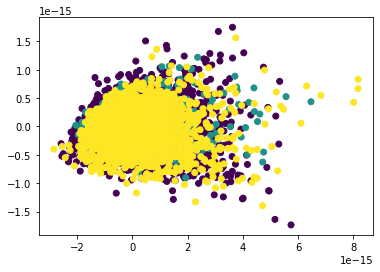

In [24]:

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn import datasets
# from sklearn.decomposition import PCA

data = latent_vector.drop('category', axis=1)

# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(data)
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=latent_vector['category'],
#            cmap=plt.cm.Set1, edgecolor='k', s=40)
# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(data)

import matplotlib.pyplot as plt
plt.scatter(pc[:,0],pc[:,1], c= latent_vector['category'])

In [25]:
data 

,0,1,2,3,4,5,6
0,2.889441e-13,6.124604e-13,4.399413e-13,5.002838e-13,2.019310e-13,1.0,2.287429e-12
1,2.888967e-13,6.124090e-13,4.397878e-13,5.000835e-13,2.018525e-13,1.0,2.286931e-12
2,2.886895e-13,6.119186e-13,4.395362e-13,4.997955e-13,2.018475e-13,1.0,2.287403e-12
3,2.888636e-13,6.123016e-13,4.397542e-13,5.001731e-13,2.018810e-13,1.0,2.286731e-12
4,2.888096e-13,6.121450e-13,4.397886e-13,5.000129e-13,2.019468e-13,1.0,2.288699e-12
...,...,...,...,...,...,...,...
9322,2.887755e-13,6.120225e-13,4.398079e-13,4.998613e-13,2.019168e-13,1.0,2.288708e-12
9323,2.888868e-13,6.124405e-13,4.396838e-13,5.002295e-13,2.018367e-13,1.0,2.285628e-12
9324,2.888978e-13,6.124943e-13,4.397609e-13,5.002304e-13,2.019125e-13,1.0,2.287088e-12
9325,2.888415e-13,6.123553e-13,4.396502e-13,5.002533e-13,2.018948e-13,1.0,2.286312e-12
